#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
**Approach** - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.      

**Data Description:**        
                      
Sales : Unit sales (in thousands) at each location    

Competitor Price : Price charged by competitor at each location

Income : Community income level (in thousands of dollars)

Advertising : Local advertising budget for company at each location (in thousands of dollars)              

Population : Population size in region (in thousands)      

Price : Price company charges for car seats at each site  


Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site                  

Age : Average age of the local population    

Education : Education level at each location   

Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location          


US : A factor with levels No and Yes to indicate whether the store is in the US or not

In [7]:

import pandas as pd
df = pd.read_csv('/content/Company_Data.csv')
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:

df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


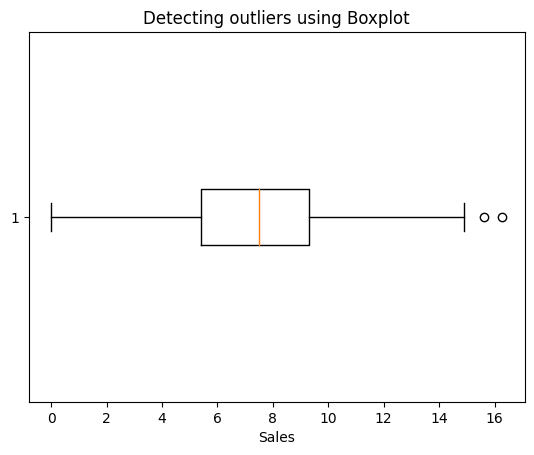

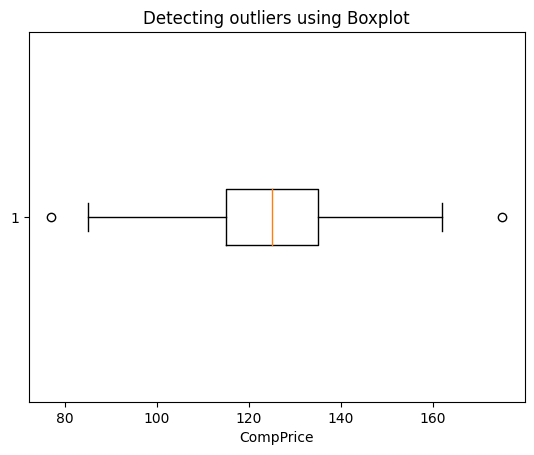

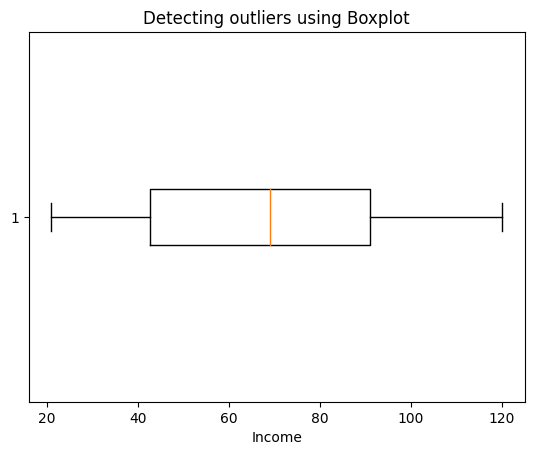

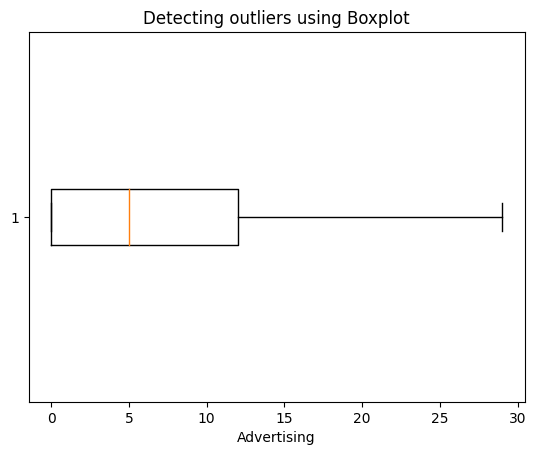

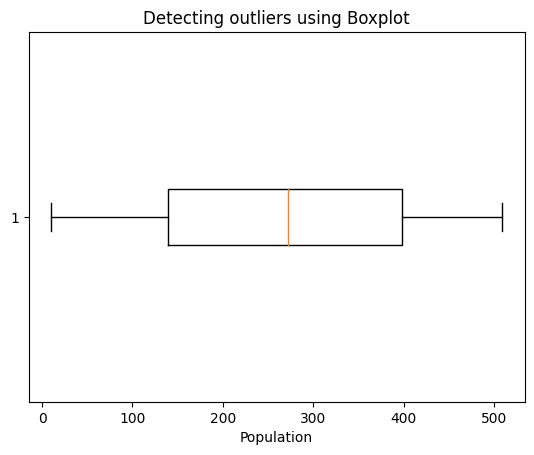

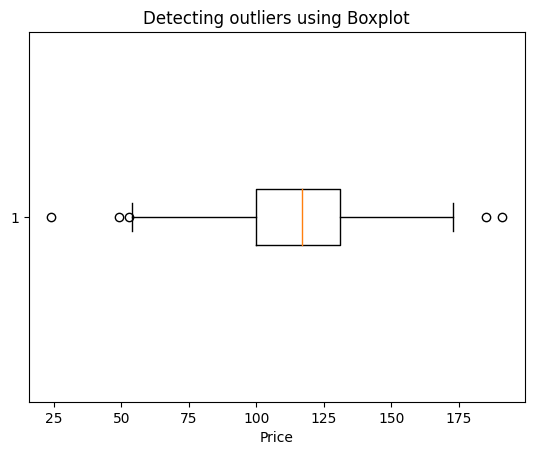

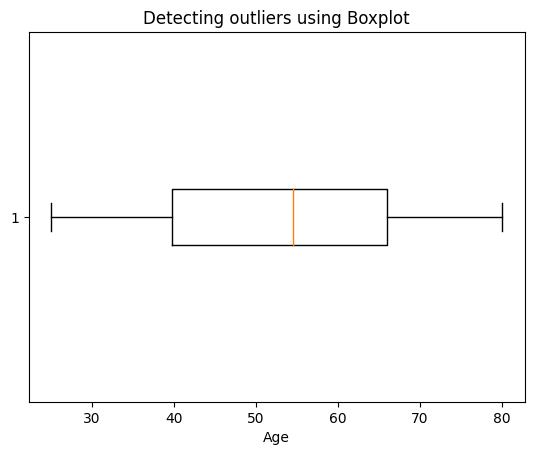

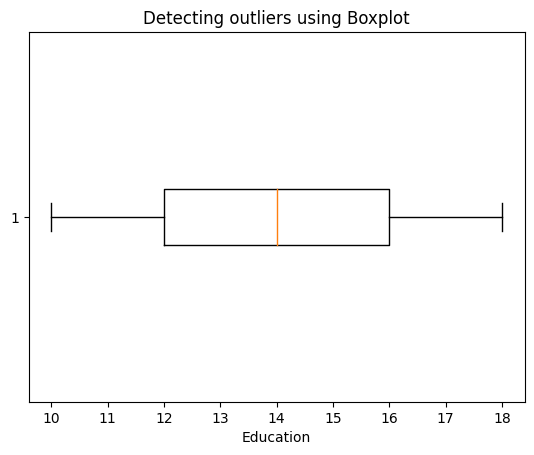

In [11]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [12]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers

In [14]:

# detecting the outliers and replacing them with median

for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)



Column:  Sales
Outliers from Z-scores method:  [16.27]
After treatment: 
Outliers from Z-scores method:  []
Column:  CompPrice
Outliers from Z-scores method:  [77, 175]
After treatment: 
Outliers from Z-scores method:  []
Column:  Income
Outliers from Z-scores method:  []
Column:  Advertising
Outliers from Z-scores method:  [29]
After treatment: 
Outliers from Z-scores method:  []
Column:  Population
Outliers from Z-scores method:  []
Column:  Price
Outliers from Z-scores method:  [24, 191]
After treatment: 
Outliers from Z-scores method:  [185.0]
Column:  Age
Outliers from Z-scores method:  []
Column:  Education
Outliers from Z-scores method:  []


In [15]:
df.nunique()

Sales          335
CompPrice       71
Income          98
Advertising     27
Population     275
Price           99
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

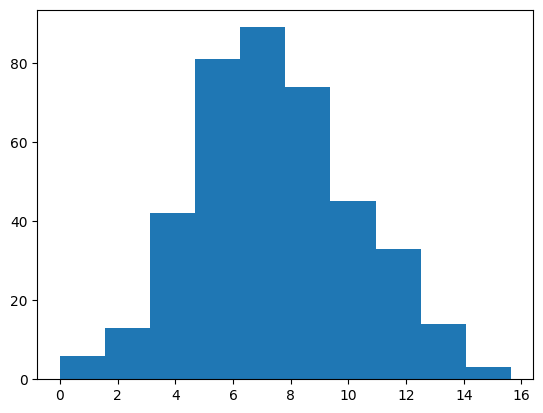

In [16]:
import matplotlib.pyplot as plt
plt.hist('Sales',data=df)
plt.show()

In [17]:
q1 = df['Sales'].quantile(0.25)
q2 = df['Sales'].quantile(0.5)
q3 = df['Sales'].quantile(0.75)

In [18]:
def categorize_sales(value):
    if value < q1:
        return 'Low'
    elif value < q3:
        return 'Moderate'
    else:
        return 'High'
df['Sales'] = df['Sales'].apply(categorize_sales)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138.0,73,11.0,276,120.0,Bad,42,17,Yes,Yes
1,High,111.0,48,16.0,260,83.0,Good,65,10,Yes,Yes
2,High,113.0,35,10.0,269,80.0,Medium,59,12,Yes,Yes
3,Moderate,117.0,100,4.0,466,97.0,Medium,55,14,Yes,Yes
4,Low,141.0,64,3.0,340,128.0,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138.0,108,17.0,203,128.0,Good,33,14,Yes,Yes
396,Moderate,139.0,23,3.0,37,120.0,Medium,55,11,No,Yes
397,Moderate,162.0,26,12.0,368,159.0,Medium,40,18,Yes,Yes
398,Moderate,100.0,79,7.0,284,95.0,Bad,50,12,Yes,Yes


In [20]:
mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138.0,73,11.0,276,120.0,0,42,17,0,0
1,0,111.0,48,16.0,260,83.0,1,65,10,0,0
2,0,113.0,35,10.0,269,80.0,2,59,12,0,0
3,1,117.0,100,4.0,466,97.0,2,55,14,0,0
4,2,141.0,64,3.0,340,128.0,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138.0,108,17.0,203,128.0,1,33,14,0,0
396,1,139.0,23,3.0,37,120.0,2,55,11,1,0
397,1,162.0,26,12.0,368,159.0,2,40,18,0,0
398,1,100.0,79,7.0,284,95.0,0,50,12,0,0


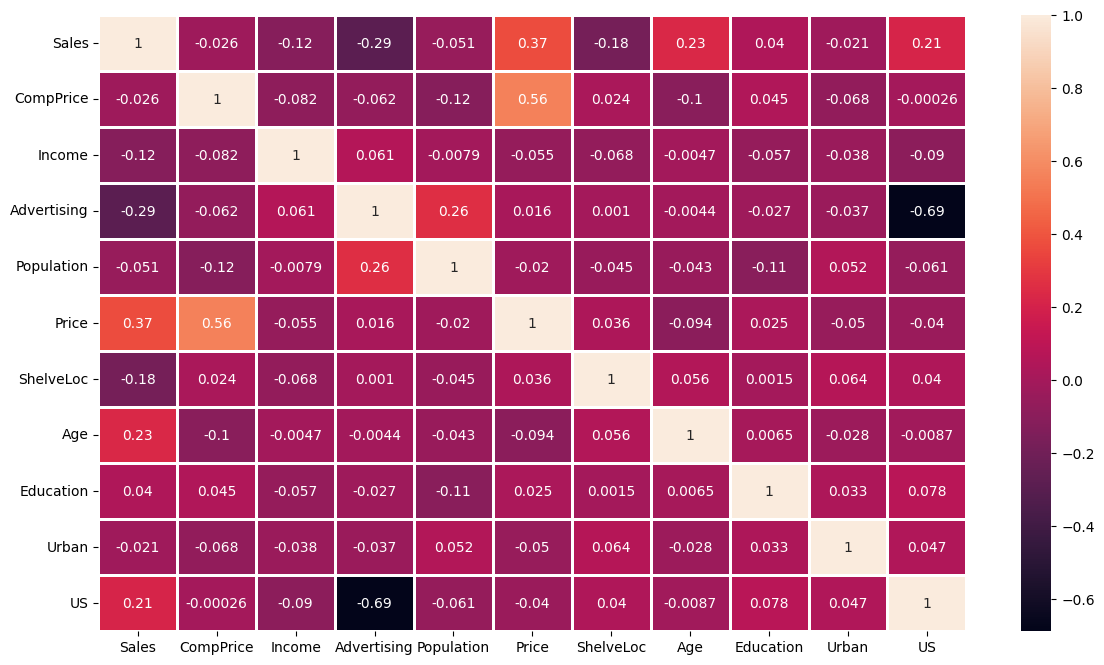

In [21]:

import seaborn as sns
plt.figure(figsize = (14, 8))
corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
y = df['Sales']
x = df.drop('Sales', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)


In [23]:

x_train


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117.0,100,4.0,466,97.0,2,55,14,0,0
18,110.0,110,0.0,408,68.0,1,46,17,1,0
202,121.0,78,4.0,413,130.0,0,46,10,1,0
250,137.0,105,10.0,435,156.0,1,72,14,0,0
274,135.0,93,2.0,67,119.0,2,34,11,0,0
...,...,...,...,...,...,...,...,...,...,...
71,148.0,51,16.0,148,150.0,2,58,17,1,0
106,102.0,33,0.0,217,139.0,2,70,18,1,1
270,119.0,26,0.0,284,89.0,1,26,10,0,1
348,132.0,102,20.0,459,107.0,1,49,11,0,0


In [24]:
y_train


3      1
18     0
202    2
250    1
274    1
      ..
71     1
106    2
270    0
348    0
102    2
Name: Sales, Length: 320, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
df = DecisionTreeClassifier()
df = df.fit(x_train, y_train)
predd = df.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predd))
print ('\n clasification report:\n', classification_report(y_test, predd))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predd))


Accuracy: 0.5125

 clasification report:
               precision    recall  f1-score   support

           0       0.53      0.36      0.43        22
           1       0.55      0.54      0.54        41
           2       0.44      0.65      0.52        17

    accuracy                           0.51        80
   macro avg       0.51      0.52      0.50        80
weighted avg       0.52      0.51      0.51        80


 confussion matrix:
 [[ 8 12  2]
 [ 7 22 12]
 [ 0  6 11]]


[Text(0.3129139072847682, 0.9642857142857143, 'x[5] <= 0.5\ngini = 0.628\nsamples = 320\nvalue = [79, 158, 83]'),
 Text(0.152317880794702, 0.8928571428571429, 'x[4] <= 107.5\ngini = 0.534\nsamples = 77\nvalue = [4, 30, 43]'),
 Text(0.0728476821192053, 0.8214285714285714, 'x[6] <= 54.5\ngini = 0.531\nsamples = 31\nvalue = [3, 19, 9]'),
 Text(0.039735099337748346, 0.75, 'x[6] <= 31.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12, 0]'),
 Text(0.026490066225165563, 0.6785714285714286, 'x[4] <= 93.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.013245033112582781, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.039735099337748346, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.052980132450331126, 0.6785714285714286, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.10596026490066225, 0.75, 'x[1] <= 92.0\ngini = 0.547\nsamples = 17\nvalue = [1, 7, 9]'),
 Text(0.07947019867549669, 0.6785714285714286, 'x[3] <= 181.0\ngini =

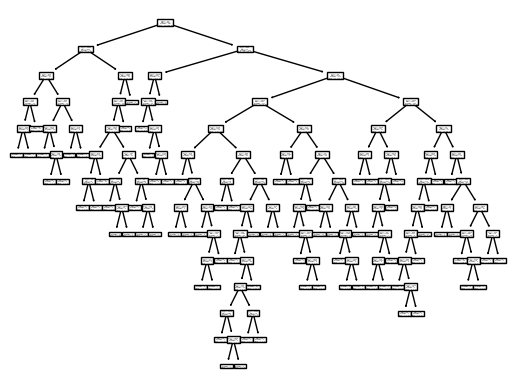

In [27]:
from sklearn import tree
tree.plot_tree(df)


In [28]:

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [29]:

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [31]:

optimize_model = GridSearchCV(estimator=df, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [37]:


df = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf=20)
df = df.fit(x_train, y_train)
predd = df.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predd))
print ('\n clasification report:\n', classification_report(y_test, predd))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predd))

Accuracy: 0.6375

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.67      0.63      0.65        41
           2       0.63      0.71      0.67        17

    accuracy                           0.64        80
   macro avg       0.63      0.64      0.64        80
weighted avg       0.64      0.64      0.64        80


 confussion matrix:
 [[13  8  1]
 [ 9 26  6]
 [ 0  5 12]]


[Text(0.3194444444444444, 0.9285714285714286, 'x[5] <= 0.5\nentropy = 1.506\nsamples = 320\nvalue = [79, 158, 83]'),
 Text(0.1111111111111111, 0.7857142857142857, 'x[4] <= 102.5\nentropy = 1.221\nsamples = 77\nvalue = [4, 30, 43]'),
 Text(0.05555555555555555, 0.6428571428571429, 'entropy = 1.273\nsamples = 25\nvalue = [3, 16, 6]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[6] <= 54.5\nentropy = 0.969\nsamples = 52\nvalue = [1, 14, 37]'),
 Text(0.1111111111111111, 0.5, 'entropy = 1.163\nsamples = 28\nvalue = [1, 11, 16]'),
 Text(0.2222222222222222, 0.5, 'entropy = 0.544\nsamples = 24\nvalue = [0, 3, 21]'),
 Text(0.5277777777777778, 0.7857142857142857, 'x[4] <= 96.5\nentropy = 1.439\nsamples = 243\nvalue = [75, 128, 40]'),
 Text(0.3888888888888889, 0.6428571428571429, 'x[2] <= 3.5\nentropy = 0.98\nsamples = 45\nvalue = [32, 12, 1]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.988\nsamples = 23\nvalue = [13, 10, 0]'),
 Text(0.4444444444444444, 0.5, 'entropy = 0.7\nsamples = 22\nv

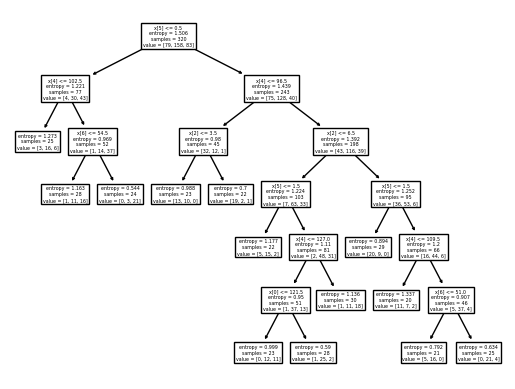

In [39]:
from sklearn import tree
tree.plot_tree(df)
from sklearn import tree
tree.plot_tree(df)

In [35]:
from sklearn import metrics

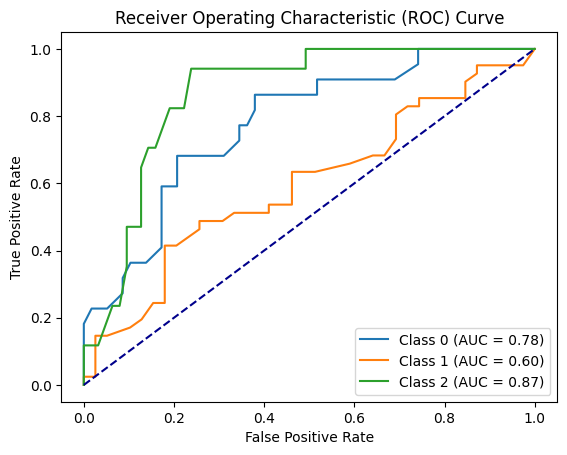

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Assuming dtc is your classifier and x_train, y_train, x_test, y_test are your data
classifier = OneVsRestClassifier(df)

# Train the classifier
classifier.fit(x_train, y_train)

# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class on the test set
pred_prob = classifier.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Three classes: 0, 1, 2
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], pred_prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()